In [1]:
from LODA import LODA
from Experiment import Run
import torch
import gym
import matplotlib.pyplot as plt
import random as rand
import numpy as np
%matplotlib inline

In [2]:
seed = 42

In [3]:
def set_seed(seed, env):
    rand.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    env.seed(seed)

In [4]:
env = gym.make('CartPole-v0')
set_seed(seed, env)

In [5]:
env.observation_space.shape[0]

4

In [6]:
agent_dict = {
    'input_dim' : env.observation_space.shape[0],
    'intrinsic_dim' : 4,
    'action_dim' : env.action_space.n,
    'policy_lr' : 0.0003,
    'approximator_lr' : 0.001,
    'critic_lr' : 0.001,
    'gradient_decay' : 0.5,
    'buffer_size' : 1024,
    'intrinsic_weight' : 10,
    'policy_hidden_dim' : None,
    'policy_non_linearity' : torch.nn.Tanh(),
    'r_net_hidden_dim' : env.observation_space.shape[0],
    'r_net_non_linearity' : torch.nn.ReLU(),
    'ppo_epsilon' : 0.2,
    'critic_hidden_dim' : env.observation_space.shape[0],
    'critic_non_linearity' : torch.nn.Tanh(),
    'reward_discount' : 0.95,
    'seed' : seed,
    'run_id' : 'alpha6',
}

In [7]:
run = Run(agent_dict, 'CartPole-v0', 10000, '', 0.1)
run.run(True)

STEP 10000/10000		

In [8]:
agent = LODA(agent_dict)

In [9]:
external_scores, intrinsic_scores = agent.run_steps(env, True, 10000)

STEP 10000/10000		

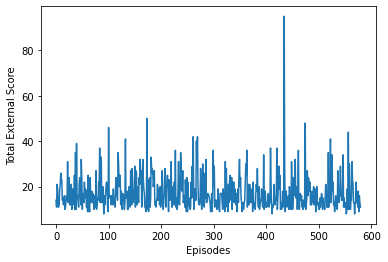

In [10]:
plt.plot(external_scores)
plt.ylabel('Total External Score')
plt.xlabel('Episodes')
plt.show()

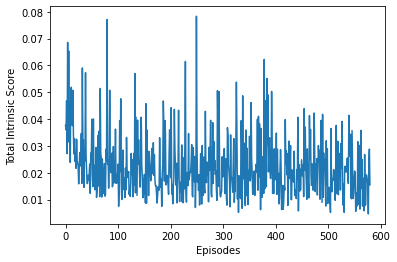

In [11]:
plt.plot(intrinsic_scores)
plt.ylabel('Total Intrinsic Score')
plt.xlabel('Episodes')
plt.show()

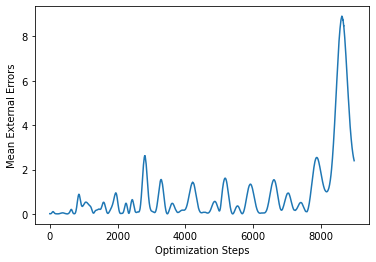

In [12]:
plt.plot(agent.external_errors)
plt.ylabel('Mean External Errors')
plt.xlabel('Optimization Steps')
plt.show()

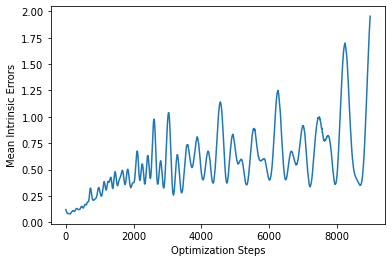

In [13]:
plt.plot(agent.intrinsic_errors)
plt.ylabel('Mean Intrinsic Errors')
plt.xlabel('Optimization Steps')
plt.savefig('test.png')

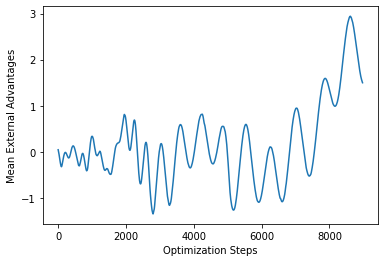

In [14]:
plt.plot(agent.external_advantages)
plt.ylabel('Mean External Advantages')
plt.xlabel('Optimization Steps')
plt.show()

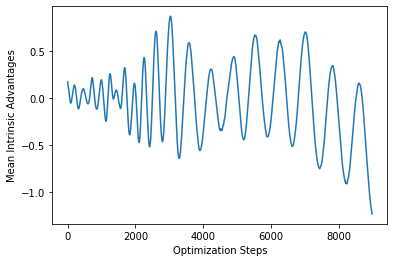

In [15]:
plt.plot(agent.intrinsic_advantages)
plt.ylabel('Mean Intrinsic Advantages')
plt.xlabel('Optimization Steps')
plt.show()